In [17]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [18]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [19]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


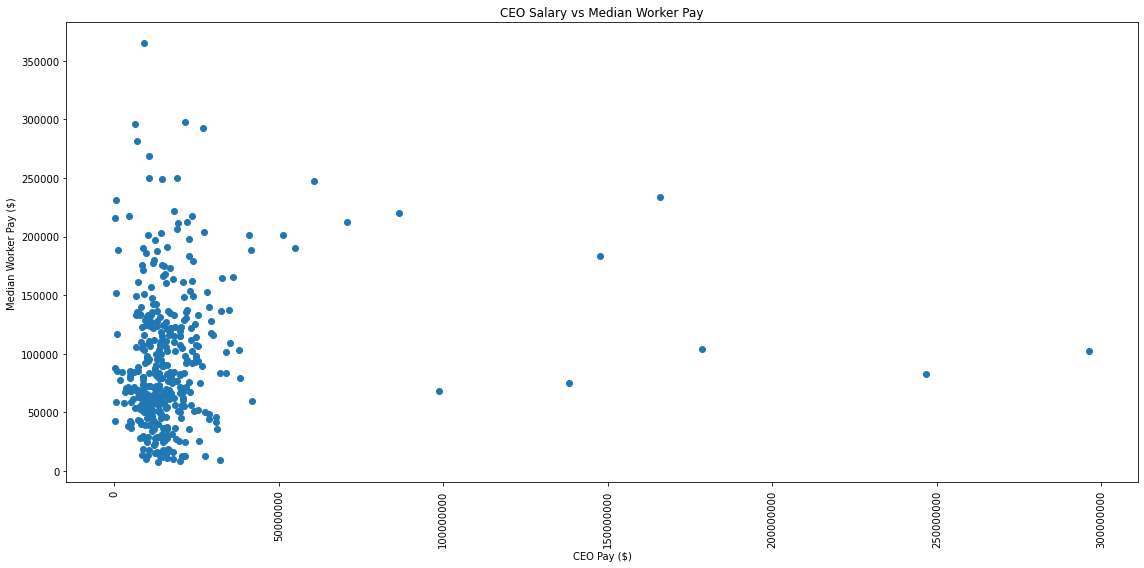

In [20]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (16,8))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorker.png")

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


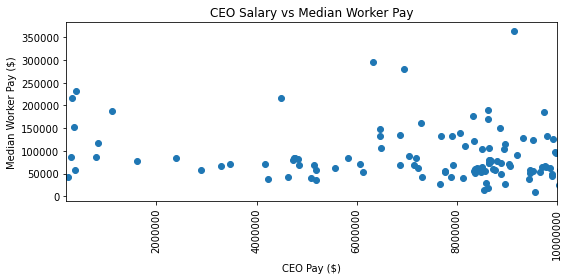

In [21]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?
#Zoomed in plot

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.xlim([200000,10000000])
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorkerZoomed.png")

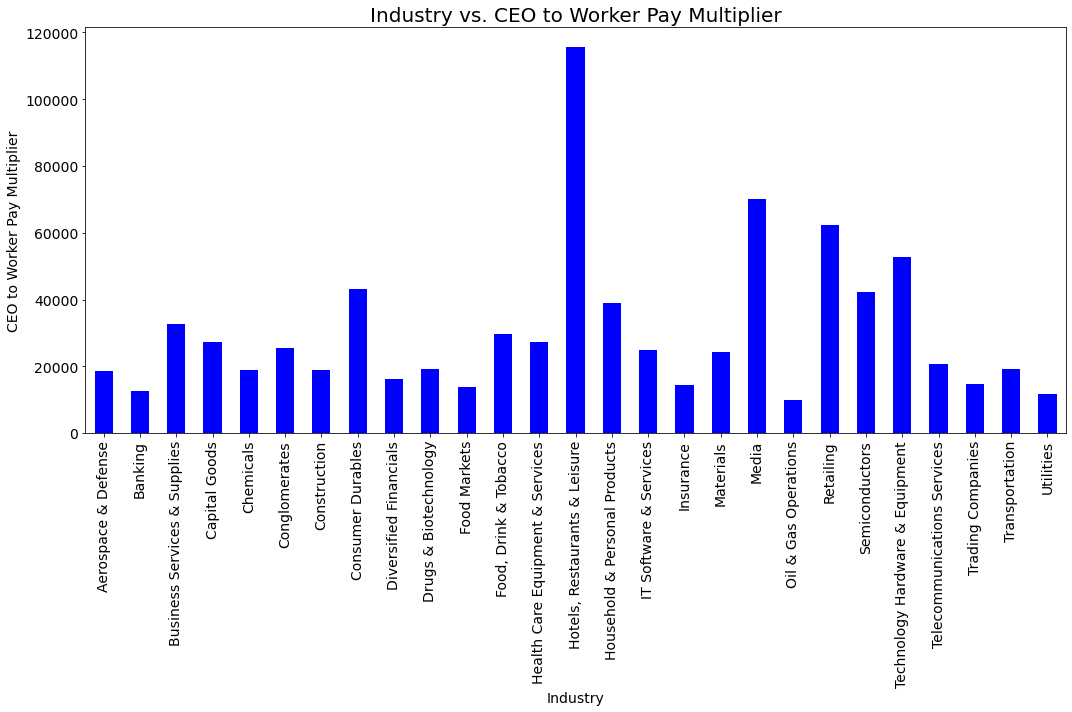

In [22]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary to Worker Pay Multiplier"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("CEO to Worker Pay Multiplier",fontsize = 14)
plt.title("Industry vs. CEO to Worker Pay Multiplier",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/CEOMult_perIndustry.png")

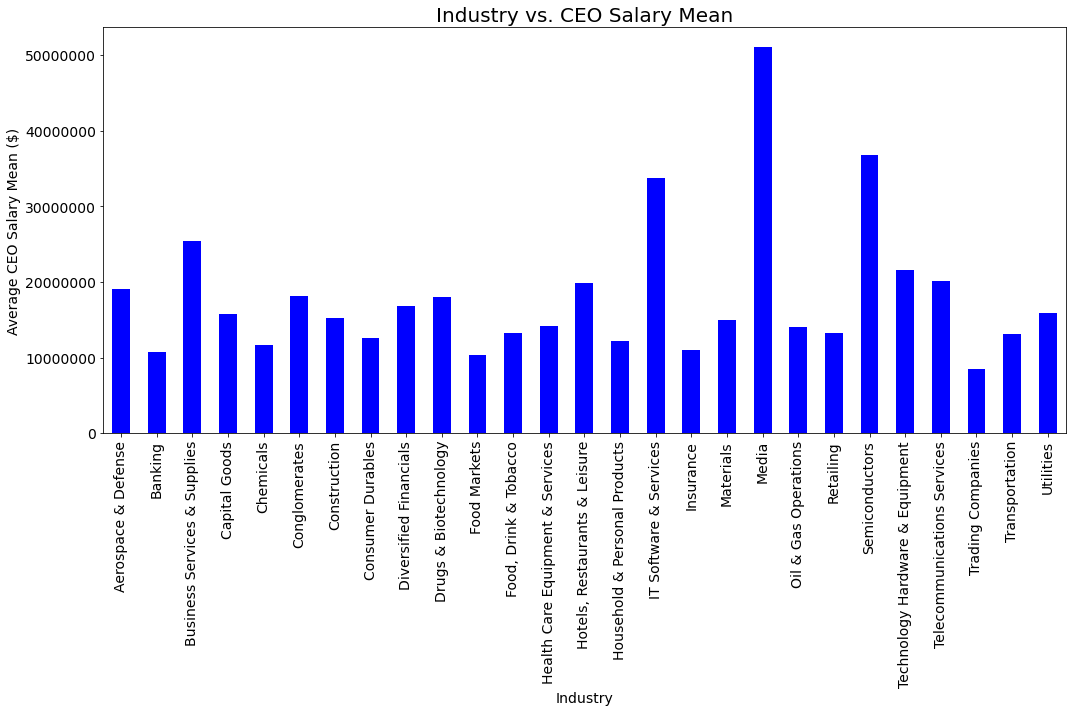

In [23]:
#Do industries that CEOs earn the most in and their workers earn the most in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Average CEO Salary Mean ($)",fontsize = 14)
plt.title("Industry vs. CEO Salary Mean",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/AvgCEO_PerIndustry.png")

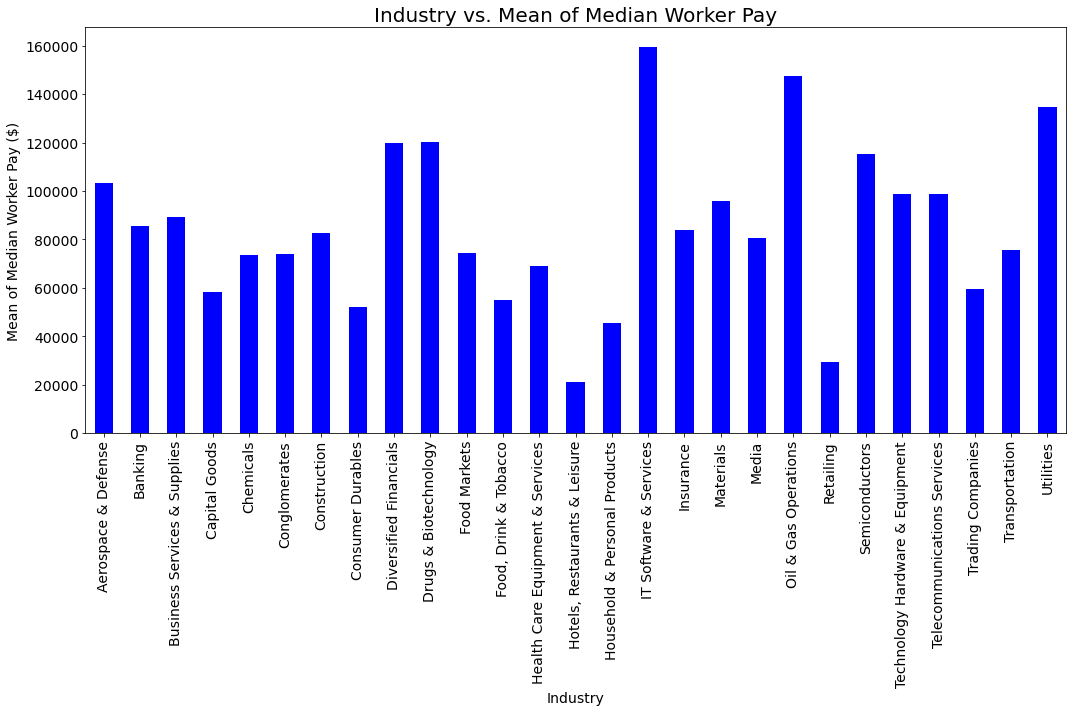

In [24]:
#Do industries that CEOs work in and their workers work in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["Median Worker Pay"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Mean of Median Worker Pay ($)",fontsize = 14)
plt.title("Industry vs. Mean of Median Worker Pay",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/MedWorker_PerIndustry.png")

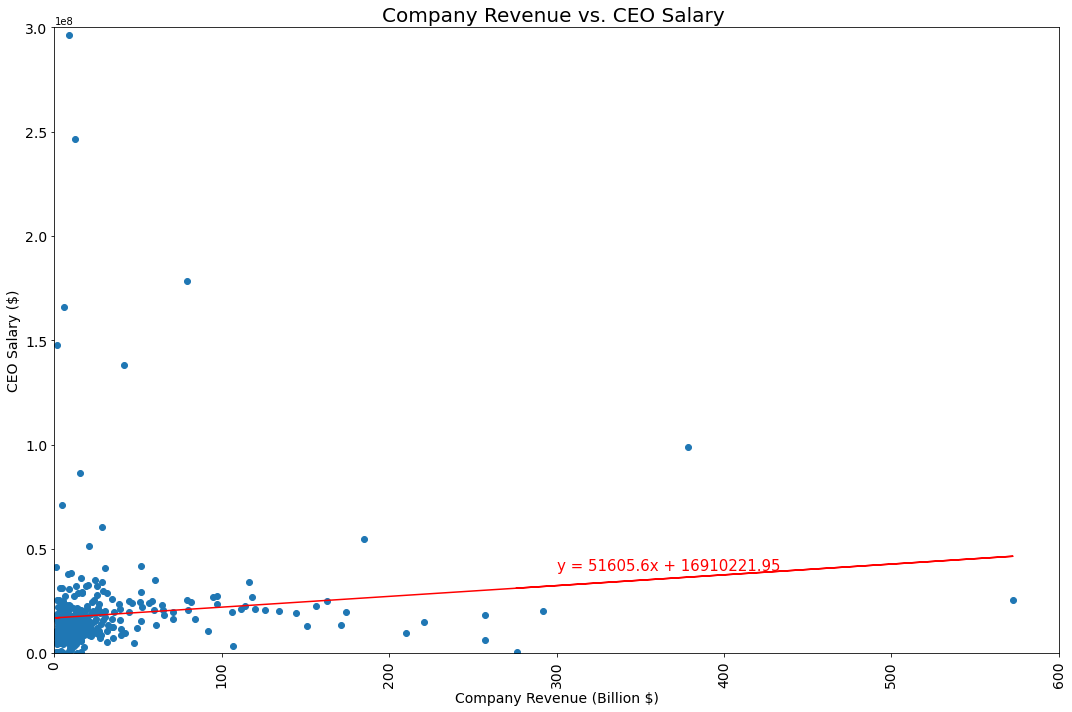

In [67]:
#Do CEOs and their workers earn more as their companies earn more?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)",fontsize = 14)
    plt.xlim([0,600])
    plt.ylim([0,300000000])
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($)",(300,40000000))
# Save the figure
plt.savefig("../Visuals/RevenuevCEO.png")

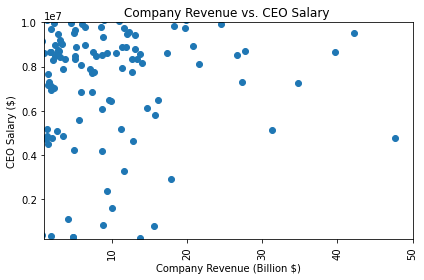

In [27]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xlim([1,50])
    plt.ylim([200000,10000000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($)",(0,20))
# Save the figure
plt.savefig("../Visuals/RevenuevCEOZoomed.png")

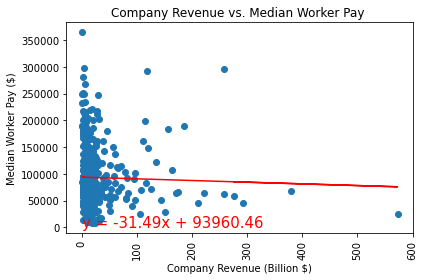

In [28]:
#Do CEOs and their workers earn more as their companies earn more?

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(0,20))
# Save the figure
plt.savefig("../Visuals/RevenuevWorker.png")

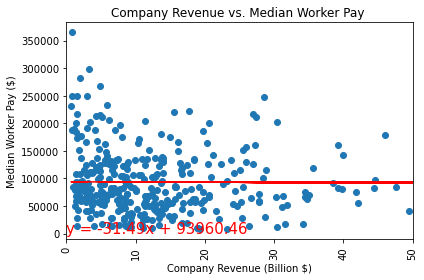

In [29]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.xlim([0,50])
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(0,20))
# Save the figure
plt.savefig("../Visuals/RevenuevWorkerZoomed.png")